# Logistic regression

In [2]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Data Generation

In [3]:
np.random.seed(12)
n = 5000

# create some random data
x1 = np.random.multivariate_normal([-1, -1], [[1, -0.75], [-0.75, 1]], n)
x2 = np.random.multivariate_normal([1, 1], [[1, -0.75], [-0.75, 1]], n)

X = np.vstack((x1, x2))
Y = np.hstack((np.zeros(n), np.ones(n)))

## Data Visualisation

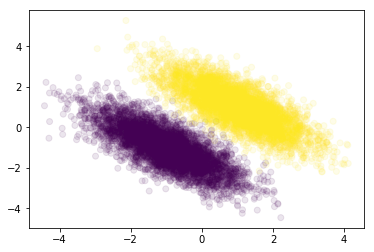

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y, alpha=0.1)

## Defining linear regression

In [5]:
def sigmoid_func(x):
    '''
            sigmoid functin
    '''
    
    return 1 / (1 + np.exp(-x))

def log_lkhd_func(x, y, w):
    '''
            Log Likelihood function
            x - features, y - targets, w - weights
    '''
    scores = x.dot(w)
    return np.sum(y*scores - np.log(1 + np.exp(scores)))

def my_logisticRegression(x, y, n_steps, l_rate, with_intecept=False):
    
    if with_intecept: 
        intercept = np.ones((x.shape[0], 1)) # вільний член (коефіцієнт без змінної)
        x = np.hstack((intercept, x))
    
    # initialize weights
    w = np.zeros(x.shape[1])
    
    for step in range(n_steps):
        
        # find gradient
        scores = x.dot(w)
        predict = sigmoid_func(scores)
        error = y - predict
        grad = x.T.dot(error)
        
        # renew weights
        w += l_rate * grad
        
        # for checking
#         if step % 10000 == 0:
#             print(log_lkhd_func(x, y, w))
    
    return w

## Find weights

In [6]:
W = my_logisticRegression(X, Y, n_steps=50000, l_rate=5e-5, with_intecept=True)

## Find weights with sklearn

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
log_regr = LogisticRegression(fit_intercept=True)#, C=1e15)
log_regr.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
print(log_regr.intercept_, log_regr.coef_)
print(W)

[-0.08134824] [[ 5.60255999  5.49441901]]
[-0.17420774  8.26161177  8.04745589]


## Plot

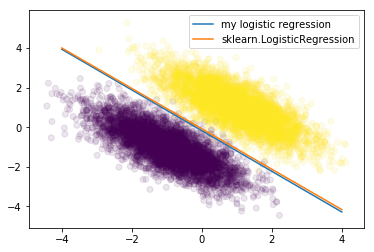

In [11]:
x_line = np.linspace(-4, 4, 10)
plt.plot(x_line, W[0] - W[1]/W[2]*x_line, label='my logistic regression')
plt.plot(x_line, log_regr.intercept_ - log_regr.coef_[0][0]/log_regr.coef_[0][1]*x_line,label='sklearn.LogisticRegression')
plt.scatter(X[:, 0], X[:, 1], c=Y, alpha=0.1)
plt.legend()